In [4]:
from preprocess import load_data
import pandas as pd
import os

dataset_path = '../../data/nutrition5k_reconstructed/'
prepared_path = './data'

image_path = os.path.join(dataset_path, 'images')
train_labels = os.path.join(prepared_path, 'train_labels.csv')
val_labels = os.path.join(prepared_path, 'val_labels.csv')
test_labels = os.path.join(prepared_path, 'test_labels.csv')

df_train = pd.read_csv(train_labels)
df_val = pd.read_csv(val_labels)
df_test = pd.read_csv(test_labels)

train_loader, val_loader = load_data(df_train, df_val, image_path, labels=["calories", "mass", "fat", "carb", "protein"], img_dim=224,batch_size=16)
print('Data Preprocessing Done')
for i, (images, labels) in enumerate(train_loader):
    print(images.shape, labels.shape)
    break
for i, (images, labels) in enumerate(val_loader):
    print(images.shape, labels.shape)
    break
print('Data Preprocessing Done')

Data Preprocessing Done
torch.Size([16, 3, 224, 224]) torch.Size([16, 5])
torch.Size([16, 3, 224, 224]) torch.Size([16, 5])
Data Preprocessing Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.5942485].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.907974].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..0.68793046].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4308496].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..0.91451].


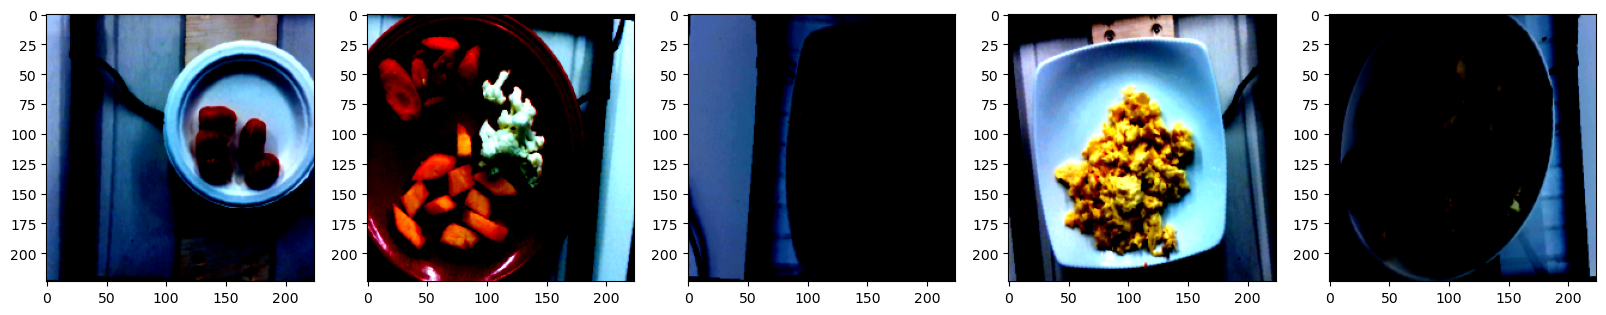

In [5]:
# show the first 5 processed images
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, labels):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(5):
        axs[i].imshow(np.transpose(images[i], (1, 2, 0)))
        
    plt.show()
    
for i, (images, labels) in enumerate(train_loader):
    show_images(images, labels)
    break

In [6]:
from preprocess import load_data
import pandas as pd
import os

dataset_path = '../../data/nutrition5k_reconstructed/'
prepared_path = './data'

image_path = os.path.join(dataset_path, 'images')
train_labels = os.path.join(prepared_path, 'train_labels_ingr.csv')
val_labels = os.path.join(prepared_path, 'val_labels_ingr.csv')
test_labels = os.path.join(prepared_path, 'test_labels_ingr.csv')

df_train = pd.read_csv(train_labels)
df_val = pd.read_csv(val_labels)
df_test = pd.read_csv(test_labels)


train_loader, val_loader = load_data(df_train, df_val, image_path, labels=["calories", "mass", "fat", "carb", "protein"], img_dim=224,batch_size=16, ingr=True)
print('Data Preprocessing Done')
for i, (images, labels) in enumerate(train_loader):
    print(images.shape, labels.shape)
    break
for i, (images, labels) in enumerate(val_loader):
    print(images.shape, labels.shape)
    break
print('Data Preprocessing Done')

Index(['brown rice', 'quinoa', 'olive oil', 'carrot', 'watermelon',
       'raspberries', 'berries', 'cantaloupe', 'pineapple', 'bacon',
       ...
       'pepperoni', 'orange with peel', 'mozzarella cheese', 'baby carrots',
       'banana with peel', 'wheat bread', 'chilaquiles', 'pasta salad',
       'balsamic vinegar', 'toast'],
      dtype='object', length=199)
Index(['brown rice', 'quinoa', 'olive oil', 'carrot', 'watermelon',
       'raspberries', 'berries', 'cantaloupe', 'pineapple', 'bacon',
       ...
       'pepperoni', 'orange with peel', 'mozzarella cheese', 'baby carrots',
       'banana with peel', 'wheat bread', 'chilaquiles', 'pasta salad',
       'balsamic vinegar', 'toast'],
      dtype='object', length=199)
Data Preprocessing Done


torch.Size([16, 3, 224, 224]) torch.Size([16, 199])
torch.Size([16, 3, 224, 224]) torch.Size([16, 199])
Data Preprocessing Done


In [ ]:
from preprocess import load_data
import pandas as pd
import os

dataset_path = '../../data/nutrition5k_reconstructed/'
prepared_path = './data'

image_path = os.path.join(dataset_path, 'images')
train_labels = os.path.join(prepared_path, 'train_labels_ingr_id.csv')
val_labels = os.path.join(prepared_path, 'val_labels_ingr_id.csv')
test_labels = os.path.join(prepared_path, 'test_labels_ingr_id.csv')

df_train = pd.read_csv(train_labels)
df_val = pd.read_csv(val_labels)
df_test = pd.read_csv(test_labels)

In [5]:
df = pd.concat([df_train, df_val, df_test], ignore_index=True)

# count the average number of ingredients per recipe
# df - id, ingr_0, ingr_1, ..., ingr_n, image_id
num_ingr = df.shape[1] - 2

# x > 0 if ingredient is present, x = 0 otherwise
num_ingr_per_recipe = df.iloc[:, 1:1+num_ingr].apply(lambda x: x > 0, axis=1).sum(axis=1)

print('Average number of ingredients per recipe:', num_ingr_per_recipe.mean())

Average number of ingredients per recipe: 7.313304721030043


In [6]:
# count how many recipes have 0 ingredients
print('Number of recipes with 0 ingredients:', num_ingr_per_recipe[num_ingr_per_recipe == 0].shape[0])

Number of recipes with 0 ingredients: 0
